In [1]:
import matplotlib.pyplot as plt
import pandas
from pandas.tools.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# import model classes
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Load dataset
filename = 'arabicReading.data'
names = ['word count','sentence count','p95','mean','median','noun','verb','prep','part','conj','adv','adj','difficulty']
with open(filename) as data_file:
    dataset = pandas.read_csv(data_file,names=names)  # pandas DataFrame
print(type(dataset))

<class 'pandas.core.frame.DataFrame'>


In [3]:
# Summarize the data
print('"Shape" of dataset:', dataset.shape,
      '({} instances of {} attributes)'.format(*dataset.shape))
print()
print('"head" of data:\n', dataset.head(20))  # head() is a method of DataFrame
print()
print('Description of data:\n:', dataset.describe())
print()
print('Class distribution:\n', dataset.groupby('difficulty').size())
print()

"Shape" of dataset: (888, 13) (888 instances of 13 attributes)

"head" of data:
     word count  sentence count    p95       mean  median      noun      verb  \
0           40               7  21.70  11.333333    10.0  0.676471  0.000000   
1          247              26  76.60  22.250000     9.5  0.556180  0.112360   
2           20               2   9.20   3.200000     1.0  0.687500  0.125000   
3           42               3  17.50   5.666667     3.0  0.647059  0.117647   
4           29               4   7.50   2.666667     1.0  0.562500  0.187500   
5           26               2  11.00   4.200000     3.0  0.619048  0.047619   
6           23               3   8.40   4.250000     3.5  0.529412  0.294118   
7          101              20  47.00  13.666667     3.5  0.707317  0.060976   
8           86              22  38.65  15.250000     8.5  0.704918  0.049180   
9           95               6  34.25  11.500000     6.0  0.608696  0.159420   
10          74              18  29.00  

Drawing boxplot...
finished


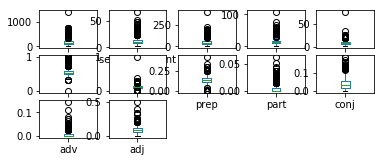

In [4]:
# Visualize the data
print('Drawing boxplot...')
dataset.plot(kind='box', subplots=True, layout=(5, 5),
             sharex=False, sharey=False)
fig = plt.gcf()  # get current figure
fig.savefig('boxplots.png')
print('finished')

In [5]:
# histograms
'''print('Drawing histograms...')
dataset.hist()
fig = plt.gcf()
fig.savefig('histograms.png')'''

"print('Drawing histograms...')\ndataset.hist()\nfig = plt.gcf()\nfig.savefig('histograms.png')"

In [6]:
# scatter plot matrix
'''print('Drawing scatterplot matrix...')
scatter_matrix(dataset)
fig = plt.gcf()
fig.savefig('scatter_matrix.png')'''

"print('Drawing scatterplot matrix...')\nscatter_matrix(dataset)\nfig = plt.gcf()\nfig.savefig('scatter_matrix.png')"

In [14]:
print('Splitting training/development set and validation set...')
# Split-out validation dataset
array = dataset.values
len_names = len(names)
features = array[:,0:12]  # comma in slice signifies a tuple (tuples in slices is a numpy array thing)
labels = array[:,-1]
print('\tfull original data and their respective labels:')
print(features[:13], labels[:13], sep='\n\n', end='\n\n\n')
validation_size = 0.20
seed = 7
feats_train, feats_validation, labels_train, labels_validation = model_selection.train_test_split(features, labels, test_size=validation_size, random_state=seed)
print('\ttraining data:\n', feats_train[:5],
      '\ttraining labels:\n', labels_train[:5],
      '\tvalidation data:\n', feats_validation[:5],
      '\tvalidation labels:\n', labels_validation[:5], sep='\n\n')

Splitting training/development set and validation set...
	full original data and their respective labels:
[[40 7 21.7 11.333333333333336 10.0 0.6764705882352942 0.0
  0.29411764705882354 0.0 0.0 0.0 0.029411764705882356]
 [247 26 76.59999999999997 22.25 9.5 0.5561797752808989
  0.11235955056179776 0.19662921348314608 0.0 0.005617977528089888
  0.011235955056179777 0.0898876404494382]
 [20 2 9.199999999999998 3.2 1.0 0.6875 0.125 0.0625 0.0 0.0 0.0 0.0625]
 [42 3 17.5 5.666666666666668 3.0 0.6470588235294118 0.1176470588235294
  0.08823529411764706 0.0 0.029411764705882356 0.0 0.08823529411764706]
 [29 4 7.5 2.6666666666666665 1.0 0.5625 0.1875 0.0625 0.0 0.0625 0.0
  0.0625]
 [26 2 11.0 4.2 3.0 0.6190476190476191 0.047619047619047616
  0.14285714285714285 0.0 0.0 0.0 0.14285714285714285]
 [23 3 8.399999999999999 4.25 3.5 0.5294117647058824 0.29411764705882354
  0.1176470588235294 0.0 0.0 0.0 0.05882352941176471]
 [101 20 47.0 13.666666666666664 3.5 0.7073170731707317
  0.06097560975609

In [15]:
# Test options and evaluation metric
seed = 7  # seeds the randomizer so that 'random' choices are the same in each run
scoring = 'accuracy'
print()

In [16]:
print('Initializing models...')
# Spot Check Algorithms
models = [('LR', LogisticRegression()),
          ('LDA', LinearDiscriminantAnalysis()),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier()),
          ('NB', GaussianNB()),
          ('SVM', SVC())]
print('Training and testing each model using 10-fold cross-validation...')
# https://chrisjmccormick.files.wordpress.com/2013/07/10_fold_cv.png
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, feats_train, labels_train,
                                                 cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = '{}:\t{:.4f}\t({:.4f})'.format(name, cv_results.mean(),
                                         cv_results.std())
    print(msg)

Initializing models...
Training and testing each model using 10-fold cross-validation...
LR:	0.5408	(0.0437)
LDA:	0.5732	(0.0467)
KNN:	0.5296	(0.0699)
CART:	0.4732	(0.0516)
NB:	0.5282	(0.0624)


c:\users\maste\envs\envtest\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
c:\users\maste\envs\envtest\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
c:\users\maste\envs\envtest\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
c:\users\maste\envs\envtest\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


SVM:	0.4634	(0.0536)


In [ ]:
print('Drawing algorithm comparison boxplots...')
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig = plt.gcf()
fig.savefig('compare_algorithms.png')

In [ ]:
# Make predictions on validation dataset
# Using svc because it performed best on cross-validation
final_model = SVC()
final_model.fit(feats_train, labels_train)
predictions = final_model.predict(feats_validation)
print('Accuracy:', accuracy_score(labels_validation, predictions))
print()
print('Confusion matrix:')
cm_labels = '1 1+ 2 2+ 3'.split()
print('labels:', cm_labels)
print(confusion_matrix(labels_validation, predictions, labels=cm_labels))
print()
print('Classification report:')
print(classification_report(labels_validation, predictions))
print(dir(final_model))
if hasattr(final_model, 'feature_importances_'):
    print('Feature "importances":')
    print(final_model.feature_importances_)
if hasattr(final_model, 'coef_'):
    print('Feature correlation coefficients:')
    print(final_model.coef_)